In [1]:
import biasgen
import numpy as np
import matplotlib.pyplot as plt

# 180 Phased Coil Example

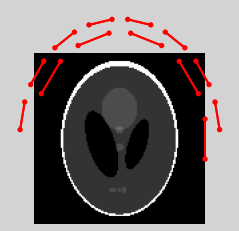

In [2]:
ph = biasgen.phantom3d()
plt.rcParams['figure.figsize'] = (8,8)

# first argument controls number of coils per level. last argument controls spacing between levels
coils = biasgen.cage_constructor([5,8], (64,64,64), 128, 0.6, (80, 65), 90, 180, (10,10))
biasgen.view_coil_positioning(ph, coils)

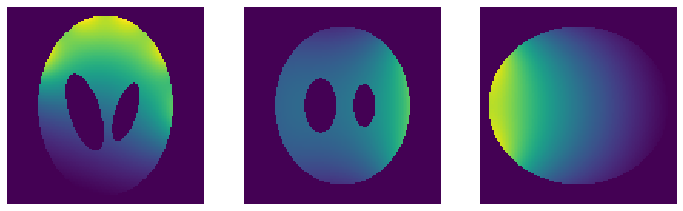

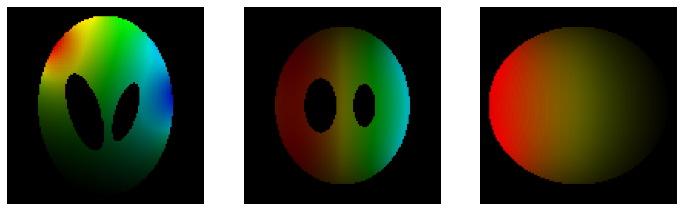

In [3]:
## Comment out if gpu not available
biasgen.use_gpu(True)

field = biasgen.compute_field(coils, ph.shape, batch_sz=8, scale_fctr=0.75, sum_coils=True)
uv = ((0,0,1.),(0,1.,0))
field_measured = biasgen.field_readout(field, uv)

ph_mask = ph > 0
plt.rcParams['figure.figsize'] = (12,8)

biasgen.view_center_axes(np.abs(field_measured), ph_mask)
biasgen.view_center_axes(field_measured, ph_mask)

# Asymmetric Sensitivity

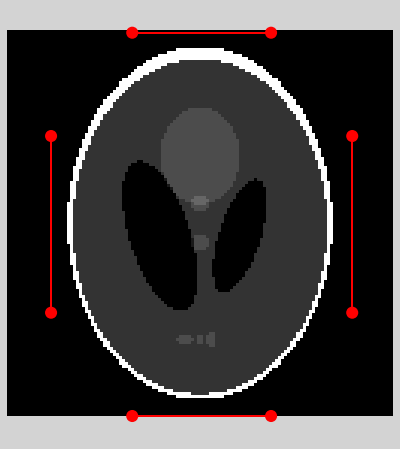

In [4]:
coils = biasgen.cage_constructor(4, (64,64,64), 128, 0.55, (70, 55), 0)
sens_settings = biasgen.SensitivitySettings((11,11,11), (1.5,1.5,1.75), (0,-0.75,0))

biasgen.view_coil_positioning(ph, coils)

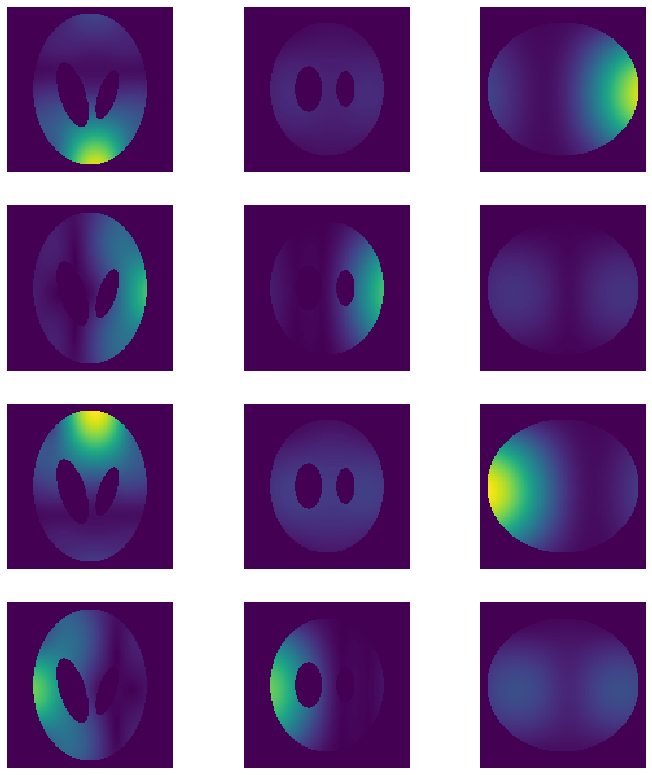

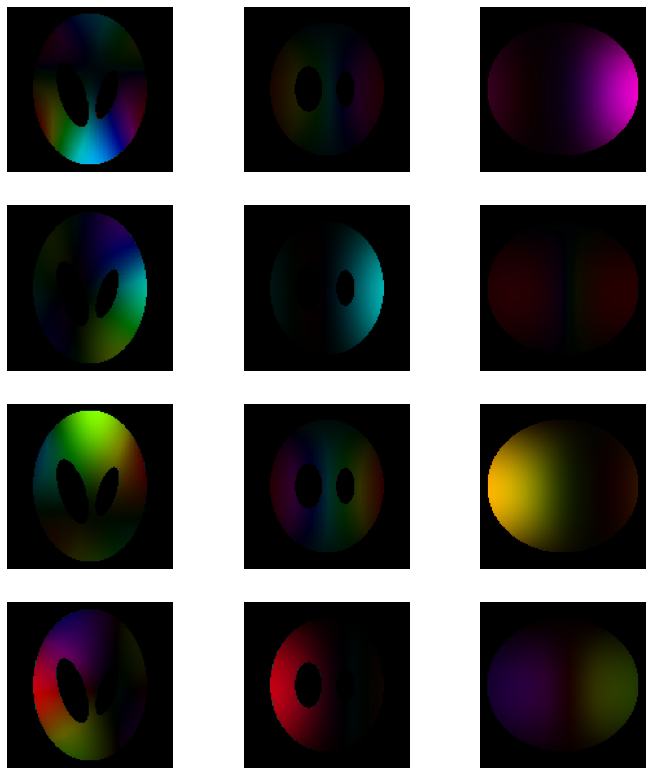

In [5]:
sens = biasgen.compute_sensitivity(coils, sens_settings, ph.shape, batch_sz=1, scale_fctr=0.125)
bias = biasgen.bias_sum_of_squares(sens)

plt.rcParams['figure.figsize'] = (12,14)

biasgen.view_center_axes(np.abs(sens), ph_mask)

biasgen.view_center_axes(sens, ph_mask)

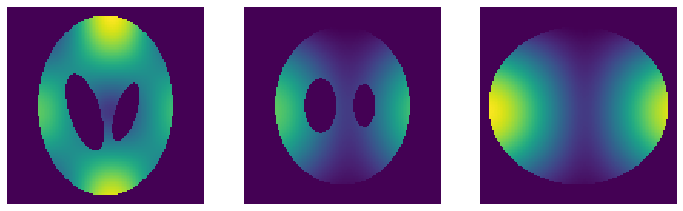

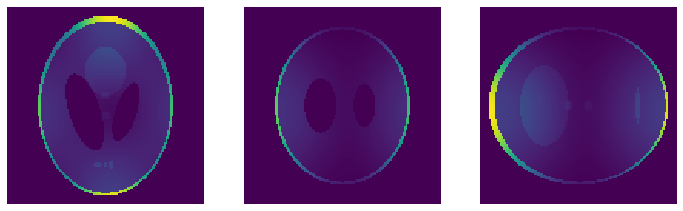

In [6]:
biasgen.view_center_axes(bias, ph_mask)
   
biasgen.view_center_axes(bias*ph, ph_mask)